In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.datasets import make_classification

In [71]:
dataset = pd.read_csv('titanic_train.csv')

In [72]:
y = dataset['Survived']
X = dataset.drop('Survived',axis=1)
tempX = X

In [73]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
X.shape[1]

11

In [75]:
y.nunique()

2

In [76]:
no_of_features = X.shape[1]
no_of_classes = y.nunique()

In [77]:
X,y = make_classification(n_samples=1000,
                              n_features=no_of_features,
                              n_classes=no_of_classes,
                              random_state=0)

In [78]:
forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

In [79]:
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [80]:
importances = forest.feature_importances_

In [81]:
print(importances)

[0.01446271 0.01236135 0.44763337 0.01356575 0.0133236  0.01256384
 0.01309132 0.29963077 0.10812309 0.05167427 0.01356992]


In [82]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

In [83]:
print(std)
indices = np.argsort(importances)[::-1]

[0.00648031 0.00588912 0.24555617 0.00603638 0.00610821 0.00598412
 0.00601379 0.20187837 0.06236221 0.03740832 0.00620454]


In [65]:
indices[0]

2

In [86]:
f_col=[]
f_col_imp=[]
for i in range(tempX.shape[1]):
    f_col.append(tempX.columns[indices[i]])
for j in range(tempX.shape[1]):
    f_col_imp.append(importances[indices[j]])

In [88]:
import plotly.express as px
fig = px.bar(tempX, x=f_col, y=f_col_imp)
fig.show()

In [47]:
print(f_col)

['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId', 'Embarked', 'Sex', 'Age', 'Parch', 'SibSp', 'Pclass']


Feature ranking:
1. feature 2 (0.447633)
2. feature 7 (0.299631)
3. feature 8 (0.108123)
4. feature 9 (0.051674)
5. feature 0 (0.014463)
6. feature 10 (0.013570)
7. feature 3 (0.013566)
8. feature 4 (0.013324)
9. feature 6 (0.013091)
10. feature 5 (0.012564)
11. feature 1 (0.012361)


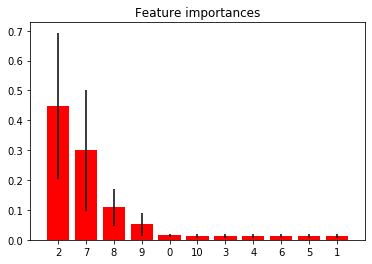

In [27]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()